# NLP with PyTorch

In [ ]:

import torch

In [3]:
x = torch.tensor([1.,2.])

print(x)

tensor([1., 2.])


In [4]:
print(type(x))

<class 'torch.Tensor'>


In [6]:
x = torch.tensor([1.,2.])
y = torch.tensor([3.,4.])

print(x * y)

tensor([3., 8.])


In [7]:
x = torch.tensor([[1.,2.],[5.,3.], [0.,4.]])

print(x[0][1])

tensor(2.)


In [8]:
print(x[0][1].item())

2.0


In [9]:
x.shape

torch.Size([3, 2])

In [ ]:
CUDA - Compute Unified Device Achitecture

In [ ]:
cuda = torch.device('cuda')

In [ ]:
x = torch.tensor([5.,3.], device=cuda)

# MNIST classifier

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable

In [12]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
28*28

784

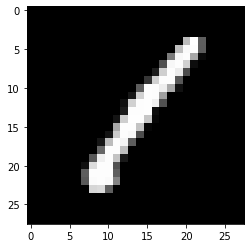

In [14]:
plt.imshow(np.reshape(df.values[0][1:], (28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [15]:
train = pd.read_csv('train.csv')
train_labels = train['label'].values

train = train.drop('label',axis=1).values.reshape(len(train), 1,28,28)

In [21]:
X = torch.Tensor(train.astype('float'))
y = torch.Tensor(train_labels).long()

In [22]:
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 10)
        
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [25]:
model = Classifier()
loss_function = nn.NLLLoss()
opt = optim.Adam(model.parameters(), lr=0.001)

In [27]:
for epoch in range(50):
    
    images = Variable(X)
    labels = Variable(y)
    
    opt.zero_grad()
    output = model(images)
    
    loss = loss_function(output, labels)
    loss.backward()
    opt.step()
    
    print("Epoch [%d/%d]  Loss: %.4f" %(epoch+1, 50, loss.data.item()))

Epoch [1/50]  Loss: 5.7638
Epoch [2/50]  Loss: 3.9241
Epoch [3/50]  Loss: 2.8825
Epoch [4/50]  Loss: 1.9570
Epoch [5/50]  Loss: 1.5428
Epoch [6/50]  Loss: 1.3809
Epoch [7/50]  Loss: 1.2399
Epoch [8/50]  Loss: 1.0859
Epoch [9/50]  Loss: 0.9415
Epoch [10/50]  Loss: 0.8722
Epoch [11/50]  Loss: 0.8336
Epoch [12/50]  Loss: 0.7282
Epoch [13/50]  Loss: 0.6585
Epoch [14/50]  Loss: 0.6000
Epoch [15/50]  Loss: 0.5428
Epoch [16/50]  Loss: 0.5347
Epoch [17/50]  Loss: 0.4980
Epoch [18/50]  Loss: 0.4325
Epoch [19/50]  Loss: 0.3971
Epoch [20/50]  Loss: 0.3916
Epoch [21/50]  Loss: 0.3731
Epoch [22/50]  Loss: 0.3517
Epoch [23/50]  Loss: 0.3101
Epoch [24/50]  Loss: 0.2638
Epoch [25/50]  Loss: 0.2364
Epoch [26/50]  Loss: 0.2542
Epoch [27/50]  Loss: 0.2189
Epoch [28/50]  Loss: 0.1784
Epoch [29/50]  Loss: 0.2120
Epoch [30/50]  Loss: 0.1642
Epoch [31/50]  Loss: 0.1797
Epoch [32/50]  Loss: 0.1555
Epoch [33/50]  Loss: 0.1594
Epoch [34/50]  Loss: 0.1300
Epoch [35/50]  Loss: 0.1374
Epoch [36/50]  Loss: 0.1481
E

In [28]:
test = pd.read_csv('test.csv')
test_labels = test['label'].values

test = test.drop('label',axis=1).values.reshape(len(test), 1,28,28)

x_test = torch.Tensor(test.astype('float'))
y_test = torch.Tensor(test_labels).long()

In [29]:
preds = model(x_test)

In [30]:
print(preds[0])

tensor([-1.4472e+01, -1.2708e+01, -1.9310e+01, -1.9150e+01, -1.1381e+01,
        -1.9761e+01, -1.4918e+01, -1.8794e+01, -1.0359e+01, -4.6967e-05],
       grad_fn=<SelectBackward>)


In [32]:
_, predictionlabel = torch.max(preds.data, 1)
predictionlabel = predictionlabel.tolist()

predictionlabel = pd.Series(predictionlabel)
test_labels = pd.Series(test_labels)

pred_table = pd.concat([predictionlabel, test_labels], axis=1)
pred_table.columns = ['predicted values', 'true values']

display(pred_table.head())

,predicted values,true values
0,9,9
1,5,5
2,2,2
3,4,4
4,1,1


In [33]:
preds = len(predictionlabel)
correct = len([1 for x,y in zip(predictionlabel, test_labels) if x==y])

print((correct/preds)*100)

88.5


# NLP Classifier

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from torch import nn, optim
import torch.nn.functional as F


In [35]:
training_data = [
        ("Veinte paginas".lower().split(), "Spanish"),
        ("I will visit the library".lower().split(), "English"),
        ("I am reading a book".lower().split(), "English"),
        ("This is my favourite chapter".lower().split(), "English"),
        ("Estoy en la biblioteca".lower().split(), "Spanish"),
        ("Tengo un libro".lower().split(), "Spanish")
        ]

test_data = [
        ("Estoy leyendo".lower().split(), "Spanish"),
        ("This is not my favourite book".lower().split(), "English")
        ]

In [36]:
word_dict = {}

i = 0

for words, language in training_data + test_data:
    for word in words:
        if word not in word_dict:
            word_dict[word] = i
            i += 1
    
print(word_dict)

{'veinte': 0, 'paginas': 1, 'i': 2, 'will': 3, 'visit': 4, 'the': 5, 'library': 6, 'am': 7, 'reading': 8, 'a': 9, 'book': 10, 'this': 11, 'is': 12, 'my': 13, 'favourite': 14, 'chapter': 15, 'estoy': 16, 'en': 17, 'la': 18, 'biblioteca': 19, 'tengo': 20, 'un': 21, 'libro': 22, 'leyendo': 23, 'not': 24}


In [37]:
corpus_size = len(word_dict)
languages = 2

label_index = {'Spanish': 0, 'English': 1}

In [38]:
class BagOfWordsClassifier(nn.Module):
    
    def __init__(self, languages, corpus_size):
        super(BagOfWordsClassifier, self).__init__()
        self.linear = nn.Linear(corpus_size, languages)
    
    def forward(self, bow_vec):
        return F.log_softmax(self.linear(bow_vec), dim=1)


In [39]:
def make_bow_vector(sentence, word_index):
    word_vec = torch.zeros(corpus_size)
    
    for word in sentence:
        word_vec[word_dict[word]] += 1
    
    return word_vec.view(1,-1)

def make_target(label, label_index):
    return torch.LongTensor([label_index[label]])

In [40]:
model = BagOfWordsClassifier(languages, corpus_size)

In [42]:
loss_function = nn.NLLLoss()

opt = optim.SGD(model.parameters(), lr=0.1)

In [43]:
for epoch in range(100):
    for sentence, label in training_data:
        
        model.zero_grad()
        
        bow_vec = make_bow_vector(sentence, word_dict)
        target = make_target(label, label_index)
        
        log_probs = model(bow_vec)
        
        loss = loss_function(log_probs, target)
        loss.backward()
        opt.step()
    
    if epoch % 10 ==0:
        print("Epoch [%d/%d]  Loss: %.4f" %(epoch+1, 100, loss.data.item()))

Epoch [1/100]  Loss: 0.6772
Epoch [11/100]  Loss: 0.1397
Epoch [21/100]  Loss: 0.0703
Epoch [31/100]  Loss: 0.0464
Epoch [41/100]  Loss: 0.0345
Epoch [51/100]  Loss: 0.0275
Epoch [61/100]  Loss: 0.0228
Epoch [71/100]  Loss: 0.0195
Epoch [81/100]  Loss: 0.0170
Epoch [91/100]  Loss: 0.0151


In [44]:
def make_predictions(data):
    
    with torch.no_grad():
        sentence = data[0]
        label = data[1]
        
        bow_vec = make_bow_vector(sentence, word_dict)
        log_probs = model(bow_vec)
        
        print(sentence)
        print(label, ":")
        print(np.exp(log_probs))

In [45]:
make_predictions(test_data[0])

['estoy', 'leyendo']
Spanish :
tensor([[0.8670, 0.1330]])


In [46]:
make_predictions(test_data[1])

['this', 'is', 'not', 'my', 'favourite', 'book']
English :
tensor([[0.0140, 0.9860]])
